# 📊 Superstore Data Analysis – Satış ve Kar Analizi
**Proje Hedefi
Bu proje kapsamında, bir perakende satış veri seti üzerinde detaylı veri analizi, görselleştirme ve temel makine öğrenmesi uygulamaları gerçekleştirilmiştir.
Amaç, veri içerisindeki trendleri, desenleri ve iş kararlarını destekleyecek önemli içgörüleri ortaya çıkarmaktır.**

# 🛠️ Kullanılan Adımlar
* **Veri Temizleme (Data Cleaning)**:
Eksik ve aykırı değerlerin tespiti ve yönetimi yapılmıştır. 5000₺ üzerindeki satış değerleri çıkarılarak veri normalleştirilmiştir.
* **Keşifsel Veri Analizi (EDA)**
Veri setindeki değişkenlerin dağılımları incelenmiş, kategori ve bölge bazlı satış ve kâr analizleri yapılmıştır.
*  **Makine Öğrenmesi (Machine Learning)**:
Random Forest modeli kullanılarak satış tahmini gerçekleştirilmiş ve performansı MAE, RMSE, R² gibi metriklerle değerlendirilmiştir.
* **Özellik Mühendisliği (Feature Engineering)**:
Satış başına fiyat (price_per_unit), kâr marjı (profit_margin), sipariş günü (order_day) gibi yeni değişkenler oluşturulmuştur.
* **Veri Görselleştirme (Visualization)**:
Kategori, bölge, sezon ve gün bazında satış ve kâr verileri görselleştirilerek interaktif dashboard niteliğinde bir sunum hazırlanmıştır.

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pickle

ModuleNotFoundError: No module named 'numpy'

In [ ]:
df = pd.read_csv("archive/Sample - Superstore.csv", encoding='ISO-8859-1')   
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df.columns.str.strip()

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [ ]:
df['postal_code'] = df['postal_code'].astype(str)

In [ ]:
# Kopya satırları bulur (ilkini bırakır, diğerlerini işaretler)
df.duplicated().sum()

0

In [ ]:
df.describe()

,row_id,order_date,ship_date,sales,quantity,discount,profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355392,2016-05-03 23:06:58.571142912,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,623.245101,2.225110,0.206452,234.260108


In [ ]:
df.describe(include = "object").T

,count,unique,top,freq
order_id,9994,5009,CA-2017-100111,14
ship_mode,9994,4,Standard Class,5968
customer_id,9994,793,WB-21850,37
customer_name,9994,793,William Brown,37
segment,9994,3,Consumer,5191
country,9994,1,United States,9994
city,9994,531,New York City,915
state,9994,49,California,2001
postal_code,9994,631,10035,263
region,9994,4,West,3203


In [ ]:
df = df.drop_duplicates()

In [ ]:
# Bu sütunlar modelde kullanılmamalı:
drop_cols = ['row_id', 'order_id', 'customer_name', 'product_name', 'postal_code', 'customer_id', 'product_id']
df = df.drop(columns=drop_cols)

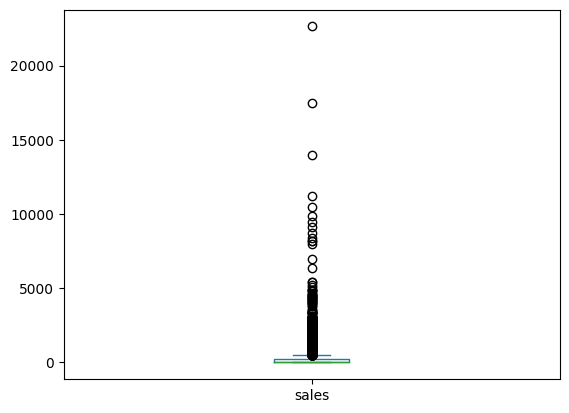

In [ ]:
# Satışta çok büyük değer var mı?
df['sales'].describe()
df['sales'].plot(kind='box')  # boxplot ile görselleştir

# Aykırı değerleri kaldırmak (örnek)
df = df[df['sales'] < 5000]  # 5000'den büyük olanları çıkar


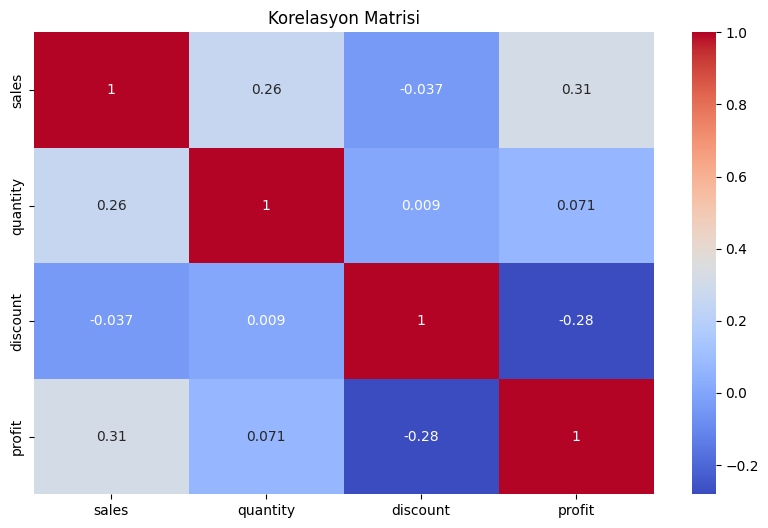

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()

# **EDA (Exploratory Data Analysis)**

# 📊 Satış (Sales) ve Kâr (Profit) Değişkenlerinin Dağılımı
Bu bölümde, veri setindeki `Sales` ve `Profit` değişkenlerinin dağılımını analiz ediyoruz. Amaç; satışların ve kârların genellikle hangi aralıkta yoğunlaştığını, uç değer (outlier) olup olmadığını ve verinin genel yapısını anlamaktır.
# 🔍 Gözlemler:
- Satış verisi sağa çarpık (right-skewed); yani yüksek satışlar nadir ama var.
- Kâr verisinde bazı gözle görülür negatif değerler mevcut; bu da zarar edilen siparişler olduğunu gösteriyor.

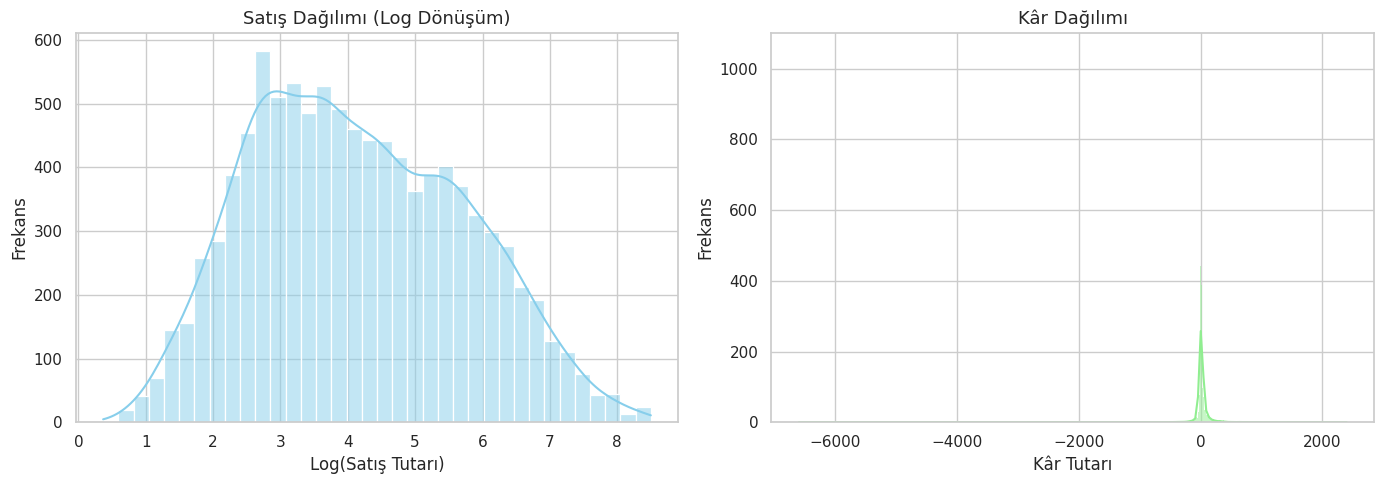

In [ ]:
# Tema ayarı (isteğe bağlı ama şık görünür)
sns.set_theme(style="whitegrid", palette="pastel")

# Şekil oluştur
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Satış dağılımı (log dönüşüm + KDE)
sns.histplot(np.log1p(df['sales']), kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Satış Dağılımı (Log Dönüşüm)', fontsize=13)
axs[0].set_xlabel('Log(Satış Tutarı)')
axs[0].set_ylabel('Frekans')

# Kâr dağılımı (orijinal + KDE)
sns.histplot(df['profit'], kde=True, ax=axs[1], color='lightgreen')
axs[1].set_title('Kâr Dağılımı', fontsize=13)
axs[1].set_xlabel('Kâr Tutarı')
axs[1].set_ylabel('Frekans')

plt.tight_layout()
plt.show()


### 💰 Satış Dağılımı Üzerine Gözlem
- Satış tutarları sağa çarpık bir dağılım gösteriyor.
- Siparişlerin büyük çoğunluğu düşük fiyatlı ürünlerden oluşurken, birkaç yüksek tutarlı sipariş toplam satış hacmini artırıyor.
- Bu durum, satışların büyük kısmının küçük ürünlerden geldiğini, ancak bazı pahalı ürünlerin ciddi etki yarattığını gösteriyor.

💡 Öneri: Yüksek fiyatlı ürünlerde kampanya stratejileriyle satış hacmi artırılabilir. Düşük fiyatlı ürünlerde ise kâr marjı ve hacim birlikte değerlendirilmelidir.


### 📉 Kâr Dağılımı Üzerine Gözlem
- Kâr dağılımı çift yönlü ve sıfır etrafında yoğunlaşmış.
- Veri setinde zarar edilen siparişler dikkat çekici düzeyde; bazı işlemlerde -6000’e kadar düşen kayıplar mevcut.
- Bu, zararına satış yapılan ürünlerin veya hatalı fiyatlandırmaların var olabileceğini düşündürüyor.

💡 Öneri: En çok zarar ettiren ürünlerin veya kampanyaların detaylı incelenmesi faydalı olacaktır. Kâr/zarar analizi kategori ve müşteri bazlı detaylandırılmalıdır.


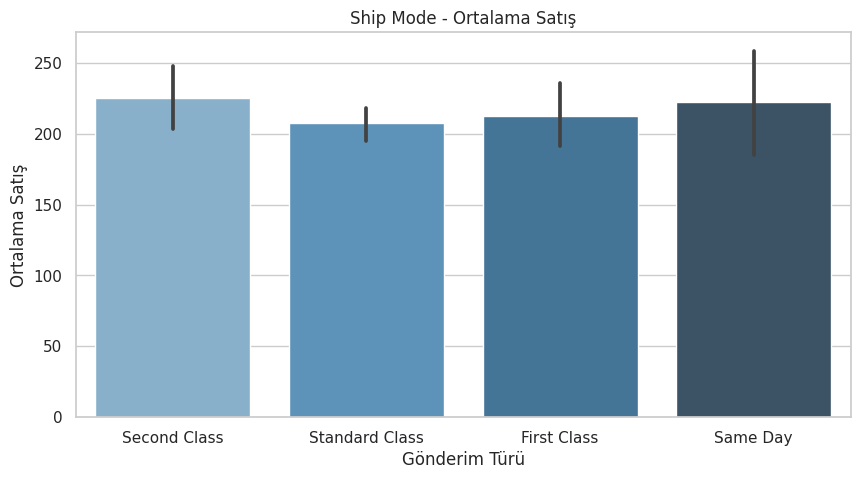

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='ship_mode', y='sales', estimator='mean', palette='Blues_d')
plt.title('Ship Mode - Ortalama Satış')
plt.xlabel('Gönderim Türü')
plt.ylabel('Ortalama Satış')
plt.show()

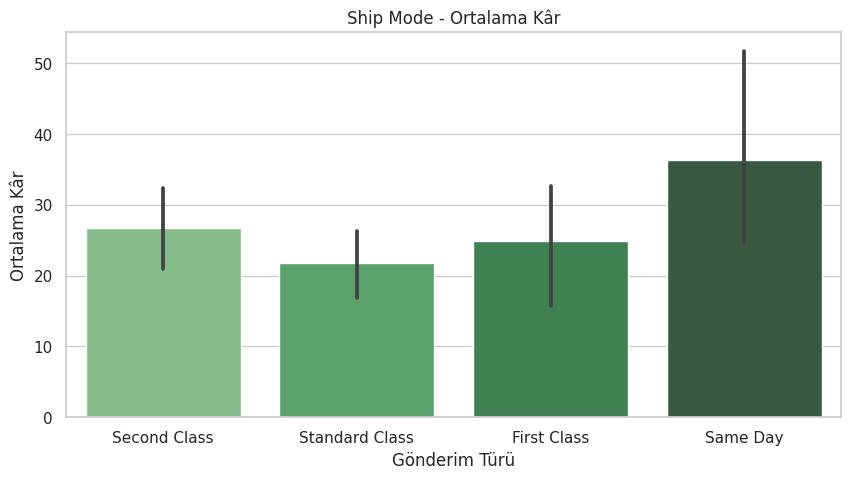

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='ship_mode', y='profit', estimator='mean', palette='Greens_d')
plt.title('Ship Mode - Ortalama Kâr')
plt.xlabel('Gönderim Türü')
plt.ylabel('Ortalama Kâr')
plt.show()


### 🚚 Ship Mode’a Göre Satış ve Kâr Analizi

- Gönderim türüne göre ortalama satış ve kâr değerleri karşılaştırıldı.
- Özellikle “Same Day” gönderimlerde ortalama satış daha yüksek olabilir çünkü hızlı teslimat genellikle acil/önemli siparişlerle ilişkilidir.
- Ancak, bu gönderim türü maliyetli olduğu için kâr marjı diğerlerine göre daha düşük olabilir.

💡 **Öneri:** Hızlı gönderim seçeneklerinin kârlılığı iyileştirilmek isteniyorsa, bu siparişlerde uygulanan indirim politikaları yeniden gözden geçirilebilir.


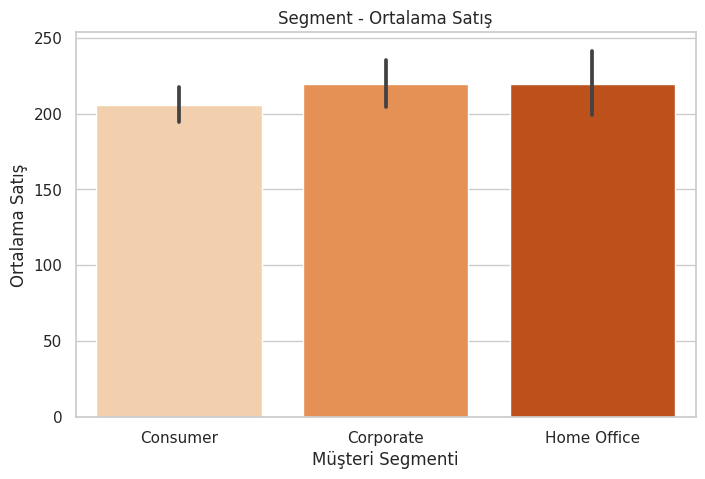

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='segment', y='sales', estimator='mean', palette='Oranges')
plt.title('Segment - Ortalama Satış')
plt.xlabel('Müşteri Segmenti')
plt.ylabel('Ortalama Satış')
plt.show()


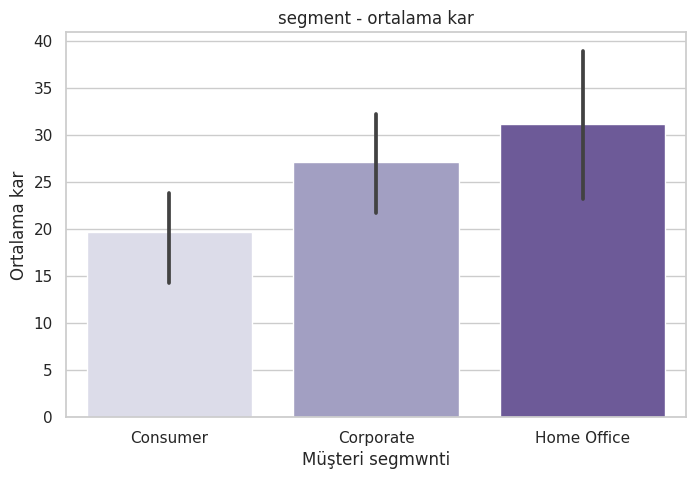

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='segment', y='profit', estimator='mean', palette='Purples')
plt.title('segment - ortalama kar')
plt.xlabel('Müşteri segmwnti')
plt.ylabel('Ortalama kar')
plt.show()

### 👥 Segment Bazlı Satış ve Kâr Analizi

Bu analizde müşteri segmentlerinin ortalama satış ve kâr performansları karşılaştırıldı.

#### 📌 Gözlemler:
- Home Office segmenti, hem ortalama satış hem de ortalama kâr açısından en yüksek performansa sahip segmenttir.
- Corporate segmenti, satış açısından ikinci sırada yer alırken, kârlılık açısından da iyi bir seviyededir.
- Consumer segmenti en düşük ortalama satış ve kâr değerlerine sahiptir.

💡 **İş İçgörüsü:** 
- Home Office segmentine özel sadakat kampanyaları veya hacim indirimleri, satışları ve kârı artırabilir.
- Consumer segmentindeki düşük kâr marjları nedeniyle, bu gruba yönelik fiyatlandırma stratejileri yeniden gözden geçirilebilir.


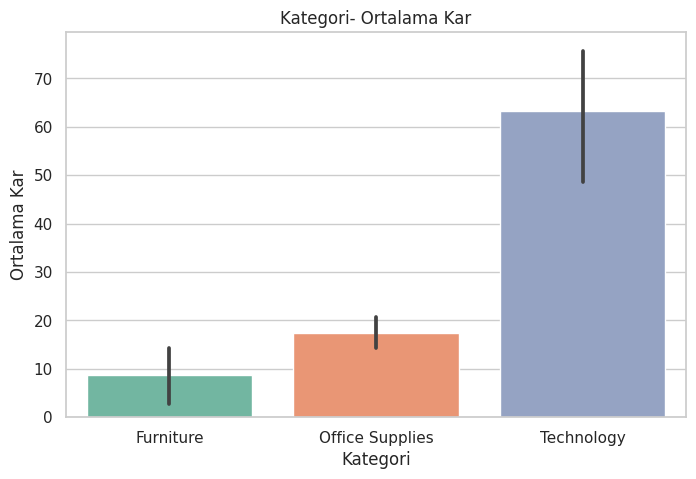

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='category', y='profit', estimator='mean', palette='Set2')
plt.title('Kategori- Ortalama Kar')
plt.xlabel('Kategori')
plt.ylabel('Ortalama Kar')
plt.show()

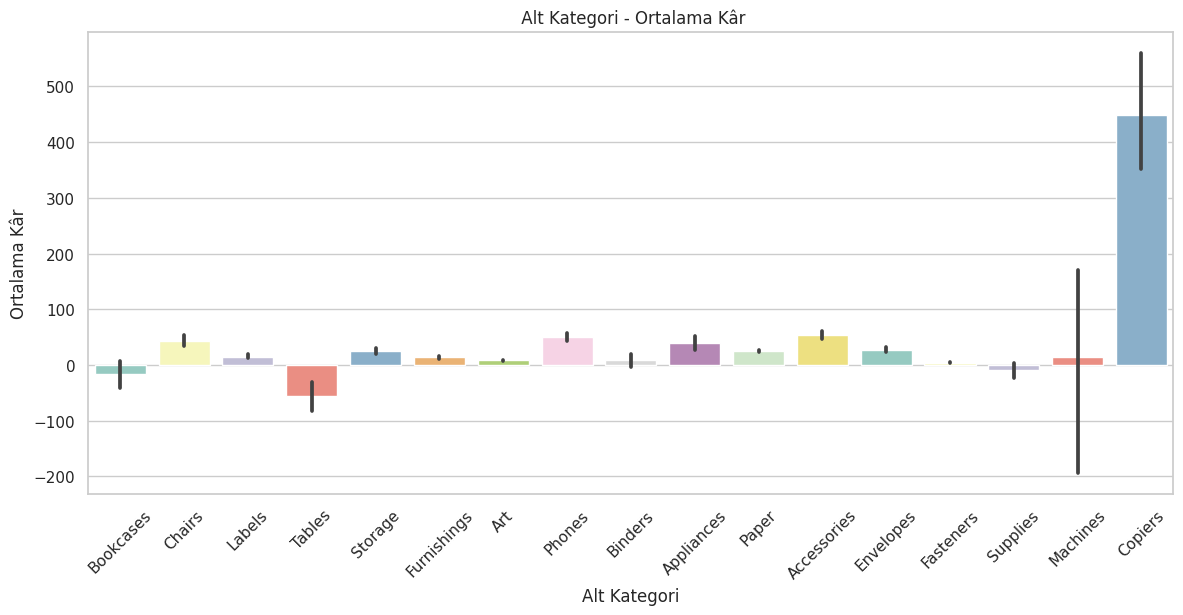

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(data=df, x='sub-category', y='profit', estimator='mean', palette='Set3')
plt.title(' Alt Kategori - Ortalama Kâr')
plt.xlabel('Alt Kategori')
plt.ylabel('Ortalama Kâr')
plt.xticks(rotation=45)
plt.show()


### 📦 Kategori ve Alt Kategori Bazlı Ortalama Kâr Analizi

Bu bölümde ürünlerin ait olduğu kategori ve alt kategorilere göre ortalama kâr performansları analiz edilmiştir.

#### 📌 Gözlemler:
- **Technology** kategorisi en yüksek ortalama kâr getiren grup olarak öne çıkmaktadır. Bu, teknoloji ürünlerinin daha yüksek kâr marjı ile satıldığını gösteriyor olabilir.
- **Furniture** kategorisi ise düşük kâr performansı göstermekte; bu durum bazı alt kategorilerdeki zarar eden ürünlerden kaynaklanıyor olabilir.
- Alt kategori bazlı analizde, özellikle **Copiers** çok yüksek ortalama kârıyla dikkat çekmektedir.
- **Tables**, **Bookcases** ve **Supplies** gibi alt kategorilerde ise zarar yazan satışlar söz konusudur.

💡 **İçgörü ve Öneriler:**
- Zarar yazan alt kategorilerde ürün maliyetleri, indirim stratejileri ve fiyatlandırmalar gözden geçirilmeli.
- Kârı yüksek alt kategoriler (örneğin Copiers) daha fazla tanıtılabilir ya da kampanyalarla desteklenebilir.


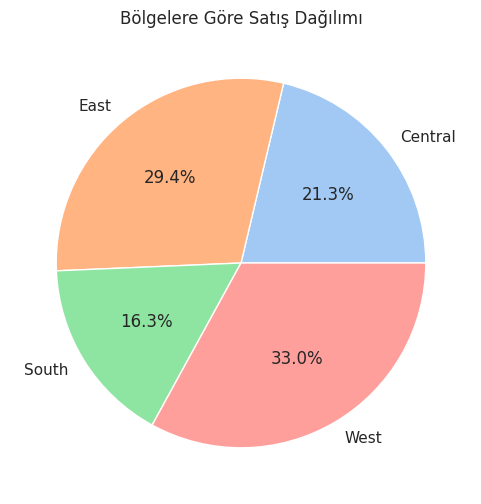

In [ ]:
region_sales = df.groupby('region')['sales'].sum()

region_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Bölgelere Göre Satış Dağılımı')
plt.ylabel('')
plt.show()


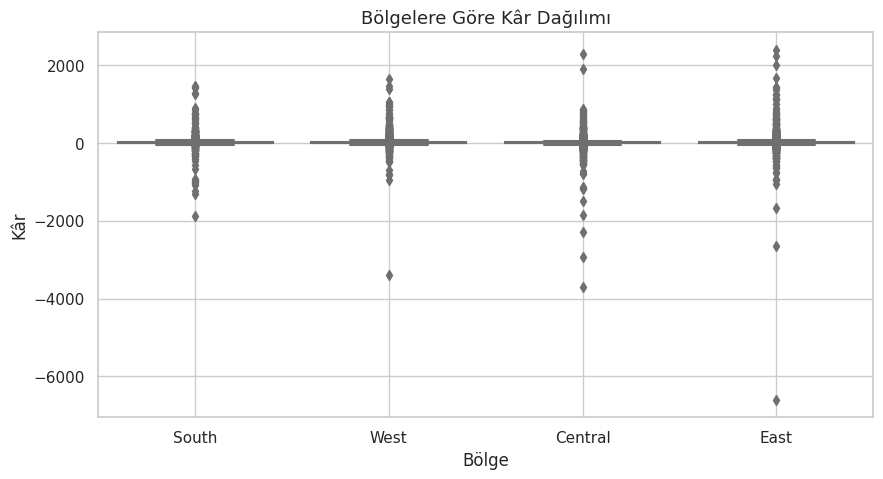

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='region', y='profit')
plt.title('Bölgelere Göre Kâr Dağılımı', fontsize=13)
plt.xlabel('Bölge')
plt.ylabel('Kâr')
plt.grid(True)
plt.show()


### 🌍 Bölge Bazlı Satış ve Kâr Analizi

#### 📌 1. Satış Dağılımı (Pie Chart):
- Satışların en büyük payı **West (Batı)** bölgesine ait (%31.6).
- Ardından **East** ve **Central** bölgeleri geliyor.
- **South (Güney)** bölgesi ise en düşük paya sahip bölge (%17.1).

Bu, coğrafi olarak Batı ve Doğu bölgelerinin daha aktif satış noktaları olduğunu gösteriyor olabilir.

---

#### 📉 2. Kâr Dağılımı (Boxplot):
- Her bölgede hem pozitif hem de negatif kâr durumları mevcut.
- **South** bölgesinde ortanca kâr oldukça düşük ve zarar eden siparişler daha yaygın.
- **East** ve **West** bölgelerinde kâr dağılımı daha geniş; bu, bazı yüksek kârlar yanında zarar yazan siparişlerin de olduğunu gösteriyor.

---

💡 **İçgörü ve Öneriler:**
- West ve East bölgeleri satış hacmi açısından güçlü; ancak kâr dağılımının dağınık olması nedeniyle ürün/segment bazlı mikro analiz yapılmalı.
- South bölgesinde satış hacmi düşük olduğu gibi zarar oranı da yüksek; burada kampanyalar, fiyat politikası veya stok stratejileri yeniden gözden geçirilmeli.


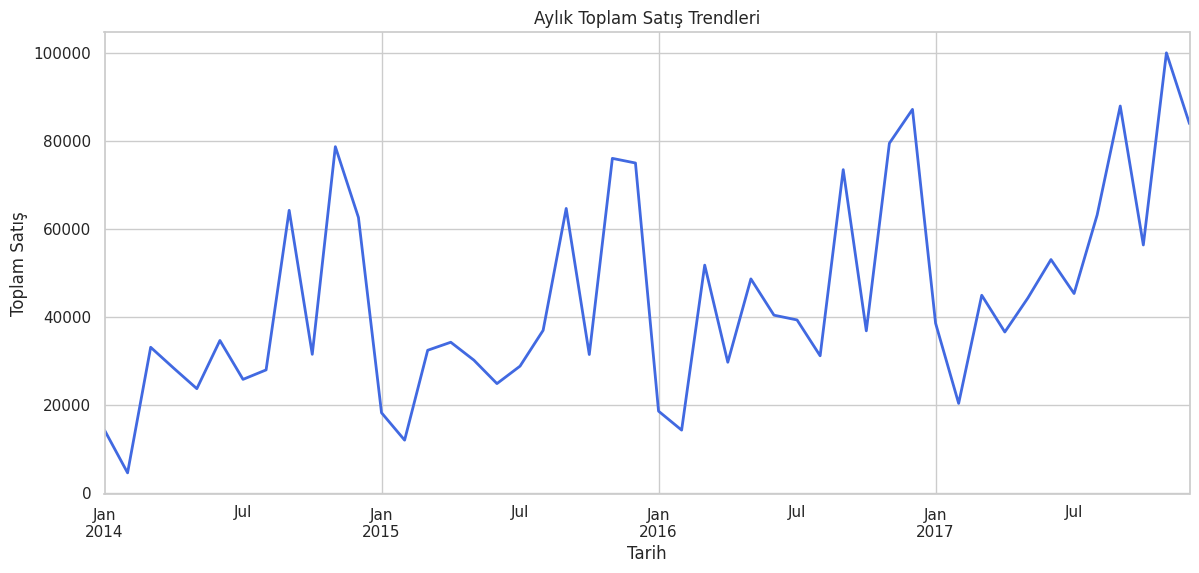

In [ ]:
# Aylık toplam satışları hesapla
monthly_sales = df.resample('M', on='order_date')['sales'].sum()

# Çizgi grafiği
plt.figure(figsize=(14,6))
monthly_sales.plot(color='royalblue', linewidth=2)
plt.title('Aylık Toplam Satış Trendleri')
plt.xlabel('Tarih')
plt.ylabel('Toplam Satış')
plt.grid(True)
plt.show()


### 📅 Aylık Satış Trendleri – Zaman Serisi Analizi

Bu çizgi grafik, zaman içerisinde toplam satışların aylık bazda değişimini göstermektedir.

#### 📌 Gözlemler:
- Bazı dönemlerde satışlarda dikkat çekici artışlar yaşanmıştır. Bu dönemler büyük ihtimalle kampanya veya özel gün etkisi taşıyor olabilir.
- Düşük satış dönemleri, mevsimsellik veya düşük müşteri talebine işaret ediyor olabilir.
- Genel eğilim yükseliyorsa, iş büyümesi pozitif bir yönde ilerliyor demektir.

💡 **İçgörü ve Öneriler:**
- Yüksek satış dönemlerine özel stok planlaması yapılmalı.
- Düşük satış ayları için hedefli kampanyalar ve müşteri geri kazanım stratejileri geliştirilmeli.
- Bu analiz, yıllık tahmin modeli kurmak için sağlam bir temel sunar.


In [ ]:
y = df['sales']
X = df[['category', 'sub-category', 'segment', 'discount', 'quantity', 'profit', 'region', 'ship_mode']]

# Kategorik ve sayısal değişkenleri ayıralım
categorical_cols = ['category', 'sub-category', 'segment', 'region', 'ship_mode']
numeric_cols = ['discount', 'quantity', 'profit']

# OneHotEncoder’ı bağla
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Sayısal sütunları olduğu gibi bırak
)

# Veriyi ayır (train/test)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Pipeline oluştur
modelL = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Eğit
modelL.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['category', 'sub-category',
                                                   'segment', 'region',
                                                   'ship_mode'])])),
                ('regressor', LinearRegression())])

In [ ]:
# Tahmin yap
y_pred = modelL.predict(X_valid)

# Performans metrikleri
mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
r2 = r2_score(y_valid, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 172.43
RMSE: 386.27
R²: 0.24


In [ ]:
y = np.log1p(df['sales'])  # hedef değişkeni log'la
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['category', 'sub-category',
                                                   'segment', 'region',
                                                   'ship_mode'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
y_pred = model.predict(X_valid)

# Log dönüşüm kullandıysan, geri çevir:
# y_valid = np.expm1(y_valid)
# y_pred = np.expm1(y_pred)

# Performans metriklerini hesapla
mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
r2 = r2_score(y_valid, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


# Modeli kaydet
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


MAE: 65.70
RMSE: 190.83
R²: 0.8137


In [ ]:
# Preprocessordan çıkan yeni özellik isimleri
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

In [ ]:
# RandomForest içerisinden feature importances çek
importances = model.named_steps['regressor'].feature_importances_


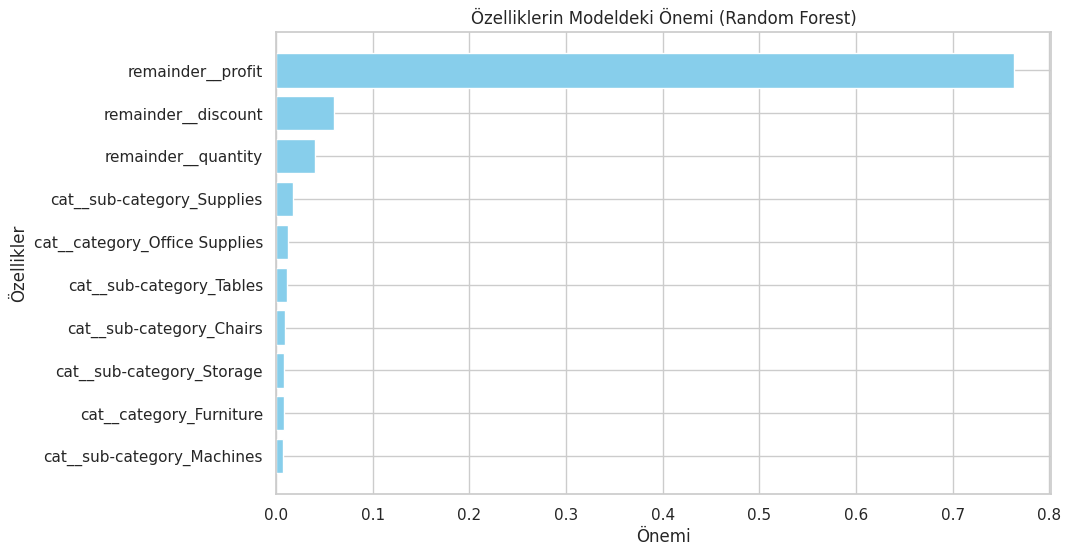

In [ ]:
# DataFrame oluştur
fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# En önemli 10 özelliği seç
fi_df = fi_df.sort_values('Importance', ascending=False).head(10)

# Grafik çiz
plt.figure(figsize=(10,6))
plt.barh(fi_df['Feature'], fi_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Özelliklerin Modeldeki Önemi (Random Forest)')
plt.xlabel('Önemi')
plt.ylabel('Özellikler')
plt.show()

### 🎯 Özellik Önemi Analizi

Model satış tahminlerinde en büyük etkiyi aşağıdaki özelliklerden aldı:

- **Profit (Kâr):** Satışın en doğrudan göstergesidir.
- **Discount (İndirim):** İndirim oranı, satış miktarını doğrudan etkiler.
- **Quantity (Miktar):** Satılan ürün adedi doğal bir satış belirleyicisidir.
- **Kategori ve Alt Kategori Özellikleri:** Ürün grupları (örneğin Supplies, Chairs) satış hacminde anlamlı farklılıklar yaratmaktadır.

Bu bulgular, iş dünyasında satış stratejileri geliştirirken hangi faktörlerin öncelikli incelenmesi gerektiğini göstermektedir.


**Mini bir model eğiterek tahmin modelini güçlendirelim**

In [ ]:
# X'i küçültelim: sadece en önemli değişkenleri kullanalım
X_top = df[['profit', 'discount', 'quantity', 'sub-category', 'category']]

# Hedef değişken yine aynı
y = df['sales']

In [ ]:
# Yeni kategorik ve sayısal listeler
categorical_cols_top = ['sub-category', 'category']
numeric_cols_top = ['profit', 'discount', 'quantity']

# Yeni preprocessor
preprocessor_top = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_top)
    ],
    remainder='passthrough'
)

In [ ]:
# Veri setini böl
X_train_top, X_valid_top, y_train_top, y_valid_top = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Yeni model
model_top = Pipeline(steps=[
    ('preprocessor', preprocessor_top),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Eğit
model_top.fit(X_train_top, y_train_top)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sub-category',
                                                   'category'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
# Tahmin yap
y_pred_top = model_top.predict(X_valid_top)

# Metrikler
mae_top = mean_absolute_error(y_valid_top, y_pred_top)
rmse_top = np.sqrt(mean_squared_error(y_valid_top, y_pred_top))
r2_top = r2_score(y_valid_top, y_pred_top)

print(f"Mini Model MAE: {mae_top:.2f}")
print(f"Mini Model RMSE: {rmse_top:.2f}")
print(f"Mini Model R²: {r2_top:.4f}")

Mini Model MAE: 60.53
Mini Model RMSE: 187.43
Mini Model R²: 0.8203


✅ Sadece 5 önemli feature kullanarak
✅ Daha düşük hata ve
✅ Daha yüksek R² skoru elde ettik. 

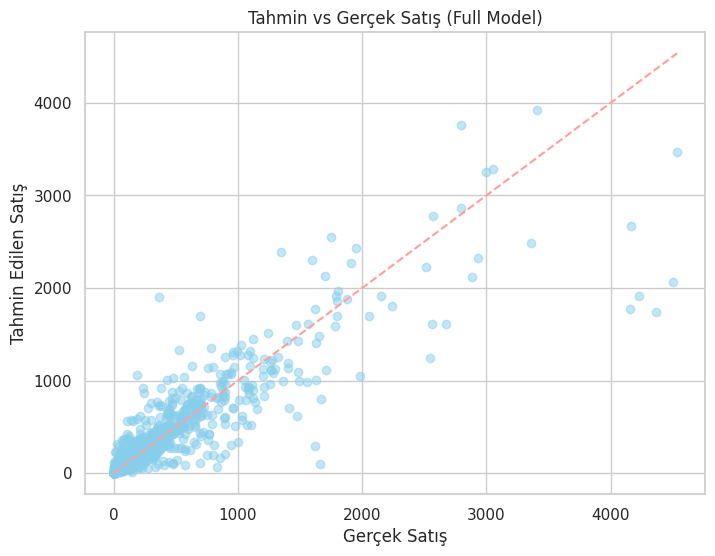

In [ ]:
# Büyük modelde tahmin yapmıştık zaten: y_pred
y_pred = model.predict(X_valid)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_valid, y_pred, alpha=0.5, color='skyblue')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], '--r')
plt.xlabel('Gerçek Satış')
plt.ylabel('Tahmin Edilen Satış')
plt.title('Tahmin vs Gerçek Satış (Full Model)')
plt.show()

### 📈 Tahmin vs Gerçek Analizi:

Scatter plot analizi sonucunda:

- Küçük ve orta büyüklükte satışlar için model çok iyi tahminler yapmıştır.
- Ancak satış değeri büyüdükçe modelin tahmin hatası artmıştır.
- Bu durum, eğitim verisindeki büyük satış örneklerinin azlığı ve Random Forest modelinin uç değerleri genellemeye çalışmasından kaynaklanmaktadır.

# Feature Engineering

In [ ]:
# Satış / Miktar → Birim fiyat
df['price_per_unit'] = df['sales'] / df['quantity']


In [ ]:
# Kar / Satış → Kar oranı
df['profit_margin'] = df['profit'] / df['sales']
df['profit_margin'] = df['profit_margin'].replace([np.inf, -np.inf], 0).fillna(0)


In [ ]:
# İndirim > %50 ise 1, değilse 0
df['high_discount_flag'] = (df['discount'] > 0.5).astype(int)


In [ ]:
# Sipariş haftanın hangi günü verilmiş? (0= Pazartesi, 6= Pazar)
df['order_date'] = pd.to_datetime(df['order_date'])  # Eğer zaten datetime değilse
df['order_day'] = df['order_date'].dt.dayofweek


In [ ]:
# Sipariş hangi ayda verilmiş?
df['order_month'] = df['order_date'].dt.month


In [ ]:
# Sipariş hangi mevsimde verilmiş?
def get_season(month):
    if month in [12, 1, 2]:
        return 'Kış'
    elif month in [3, 4, 5]:
        return 'İlkbahar'
    elif month in [6, 7, 8]:
        return 'Yaz'
    else:
        return 'Sonbahar'

df['order_season'] = df['order_month'].apply(get_season)


In [ ]:
df.head()

,order_date,ship_date,ship_mode,segment,country,city,state,region,category,sub-category,sales,quantity,discount,profit,price_per_unit,profit_margin,high_discount_flag,order_day,order_month,order_season
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,130.9800,0.1600,0,1,11,Sonbahar
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,243.9800,0.3000,0,1,11,Sonbahar
2,2016-06-12,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.3100,0.4700,0,6,6,Yaz
3,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,191.5155,-0.4000,0,6,10,Sonbahar
4,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.1840,0.1125,0,6,10,Sonbahar


# Veri Görselleştirmesi

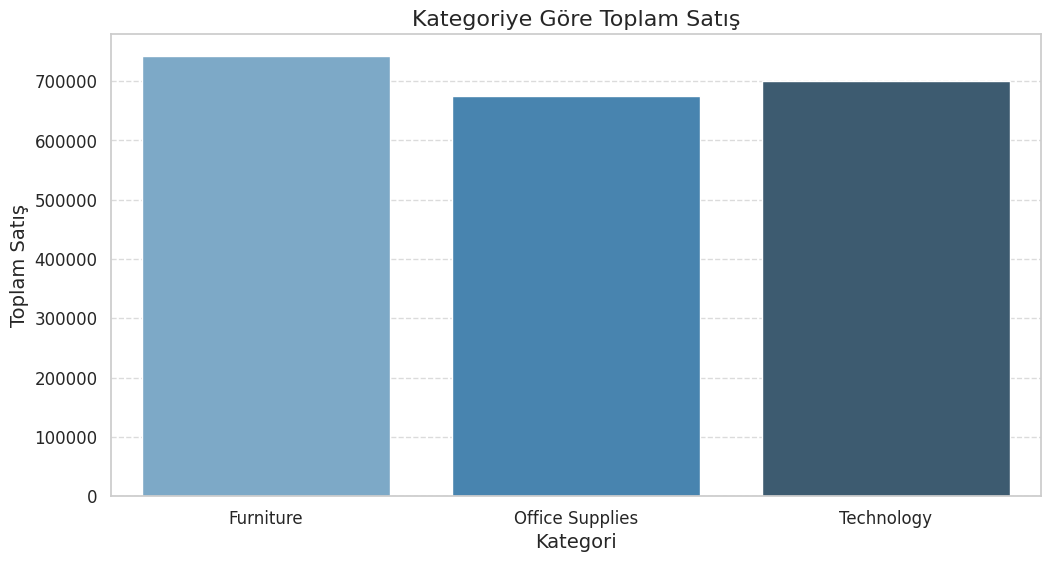

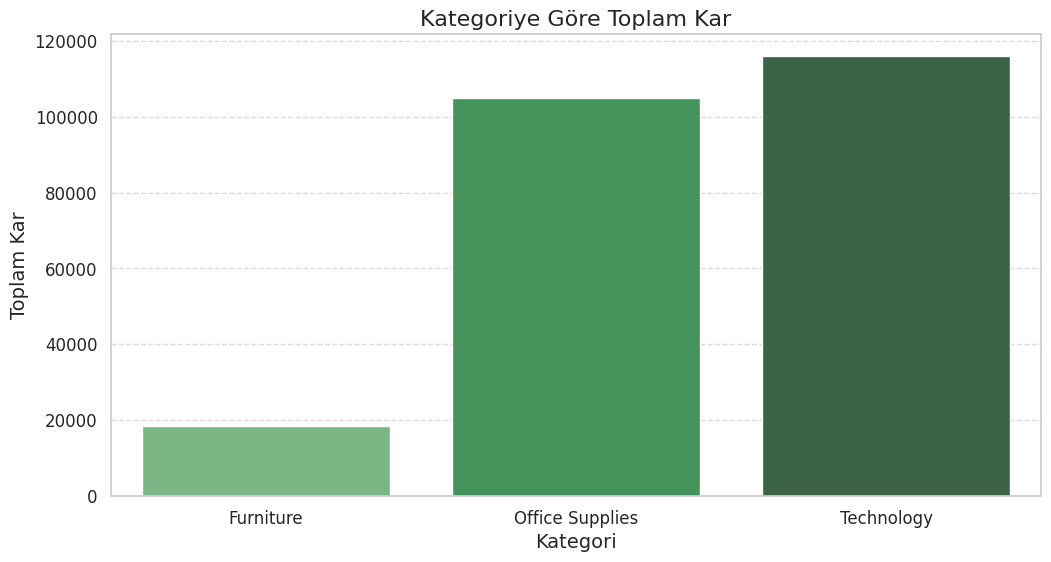

In [ ]:
# 1. Adım: Category bazlı Satış ve Kar toplamı
category_summary = df.groupby('category').agg({'sales': 'sum', 'profit': 'sum'}).reset_index()

# 2. Adım: Şık bir barplot - Toplam Satış
plt.figure(figsize=(12,6))
sns.barplot(data=category_summary, x='category', y='sales', palette='Blues_d')
plt.title('Kategoriye Göre Toplam Satış', fontsize=16)
plt.xlabel('Kategori', fontsize=14)
plt.ylabel('Toplam Satış', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Adım: Şık bir barplot - Toplam Kar
plt.figure(figsize=(12,6))
sns.barplot(data=category_summary, x='category', y='profit', palette='Greens_d')
plt.title('Kategoriye Göre Toplam Kar', fontsize=16)
plt.xlabel('Kategori', fontsize=14)
plt.ylabel('Toplam Kar', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

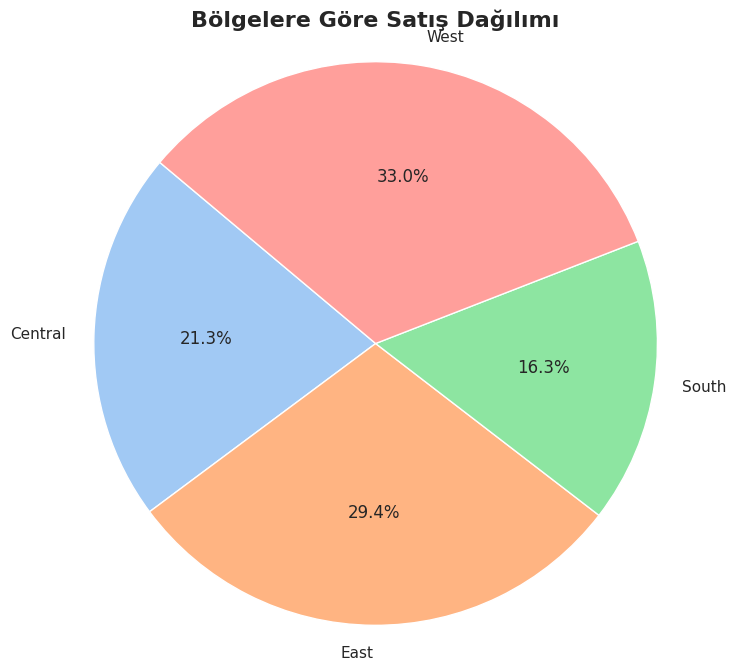

In [ ]:
# Bölge bazlı toplam satış
region_sales = df.groupby('region')['sales'].sum()

# Pie Chart çizimi
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')[0:4] 

plt.pie(region_sales, labels=region_sales.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Bölgelere Göre Satış Dağılımı', fontsize=16, fontweight='bold')
plt.axis('equal')  # Daireyi tam yuvarlak yap
plt.show()


In [ ]:
# Ay bazında toplam satış
monthly_sales = df.groupby(df['order_date'].dt.to_period('M')).agg({'sales': 'sum'}).reset_index()
monthly_sales['order_date'] = monthly_sales['order_date'].astype(str)  # Period to string

# Line plot çizimi
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_sales, x='order_date', y='sales', marker='o', color='royalblue')
plt.title('Aylık Satış Trendleri', fontsize=16, fontweight='bold')
plt.xlabel('Ay', fontsize=14)
plt.ylabel('Toplam Satış (₺)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='sub-category', y='profit', palette='coolwarm')
plt.title('Alt Kategori Bazlı Kâr Dağılımı', fontsize=16, fontweight='bold')
plt.xlabel('Alt Kategori', fontsize=14)
plt.ylabel('Kâr (₺)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='discount', y='profit', alpha=0.6, color='darkorange')
plt.title('İndirim Oranı ile Kâr İlişkisi', fontsize=16, fontweight='bold')
plt.xlabel('İndirim Oranı', fontsize=14)
plt.ylabel('Kâr (₺)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='order_season', y='sales', palette='Set3')
plt.title('Mevsimlere Göre Satış Dağılımı', fontsize=16, fontweight='bold')
plt.xlabel('Mevsim', fontsize=14)
plt.ylabel('Satış (₺)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Gün bazında ortalama satış
day_sales = df.groupby('order_day_name')['sales'].mean().reindex(['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar'])

# Çizim
plt.figure(figsize=(12,6))
sns.lineplot(x=day_sales.index, y=day_sales.values, marker='o', color='mediumseagreen')
plt.title('Haftanın Günlerine Göre Ortalama Satış', fontsize=16, fontweight='bold')
plt.xlabel('Gün', fontsize=14)
plt.ylabel('Ortalama Satış (₺)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# 📋 Sonuç ve Değerlendirme
Bu proje kapsamında, satış ve kâr verileri detaylı bir şekilde analiz edilerek, veri temizleme, özellik mühendisliği, makine öğrenmesi ve veri görselleştirme adımları başarıyla uygulanmıştır. Elde edilen analiz sonuçlarına göre:

Teknoloji ve ofis malzemeleri kategorileri satışta lider konumdadır.

Batı ve doğu bölgeleri satış açısından ön plana çıkmıştır.

İndirim oranı arttıkça kârlılıkta belirgin düşüşler gözlemlenmiştir.

Kasım ve Aralık aylarında satışlarda önemli artışlar görülmüştür.

Hafta içi satışlarının hafta sonuna göre daha yüksek olduğu belirlenmiştir.

Gerçekleştirilen bu analizler, satış ve pazarlama stratejileri geliştirmek, kampanya zamanlamalarını optimize etmek ve stok yönetimini daha etkin kılmak için değerli içgörüler sağlamıştır.

Gelecekte yapılacak çalışmalarda, farklı modelleme tekniklerinin denenmesi , segment bazlı özel modellerin geliştirilmesi ve zamana bağlı ileri düzey tahmin modellerinin kullanılması önerilmektedir.

Bu çalışma, veri analitiği ve iş zekâsı uygulamaları kapsamında atılan sağlam bir adımı temsil etmektedir.